<a href="https://www.kaggle.com/code/victorfsc/ukraine-russia-war?scriptVersionId=160259604" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#plotly
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

In [2]:
equipment = pd.read_csv('../input/2022-ukraine-russian-war/russia_losses_equipment.csv')
personnel = pd.read_csv('../input/2022-ukraine-russian-war/russia_losses_personnel.csv')

# Checking data integrity

## Personnel data integrity

In [3]:
personnel

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0.0
1,2022-02-26,3,4300,about,0.0
2,2022-02-27,4,4500,about,0.0
3,2022-02-28,5,5300,about,0.0
4,2022-03-01,6,5710,about,200.0
...,...,...,...,...,...
691,2024-01-17,693,372820,about,NaN
692,2024-01-18,694,373600,about,NaN
693,2024-01-19,695,374520,about,NaN
694,2024-01-20,696,375270,about,NaN


In [4]:
#set types
personnel.date = pd.to_datetime(personnel.date)

In [5]:
personnel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        696 non-null    datetime64[ns]
 1   day         696 non-null    int64         
 2   personnel   696 non-null    int64         
 3   personnel*  696 non-null    object        
 4   POW         62 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 27.3+ KB


## Equipment data integrity

In [6]:
equipment

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2024-01-17,693,331,324,6126,11372,8811,964,NaN,NaN,6884,23,653,1367.0,NaN,NaN,11755.0,1817.0,1.0
692,2024-01-18,694,331,324,6147,11410,8835,966,NaN,NaN,6925,23,653,1380.0,NaN,NaN,11794.0,1818.0,1.0
693,2024-01-19,695,331,324,6167,11445,8854,966,NaN,NaN,6929,23,654,1384.0,NaN,NaN,11831.0,1818.0,1.0
694,2024-01-20,696,331,324,6171,11455,8868,967,NaN,NaN,6934,23,654,1389.0,NaN,NaN,11848.0,1818.0,1.0


In [7]:
#set datetime
equipment.date = pd.to_datetime(equipment.date)

In [8]:
equipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       696 non-null    datetime64[ns]
 1   day                        696 non-null    int64         
 2   aircraft                   696 non-null    int64         
 3   helicopter                 696 non-null    int64         
 4   tank                       696 non-null    int64         
 5   APC                        696 non-null    int64         
 6   field artillery            696 non-null    int64         
 7   MRL                        696 non-null    int64         
 8   military auto              65 non-null     float64       
 9   fuel tank                  65 non-null     float64       
 10  drone                      696 non-null    int64         
 11  naval ship                 696 non-null    int64         
 12  anti-air

In [9]:
equipment.isna().sum()/equipment.shape[0]

date                         0.000000
day                          0.000000
aircraft                     0.000000
helicopter                   0.000000
tank                         0.000000
APC                          0.000000
field artillery              0.000000
MRL                          0.000000
military auto                0.906609
fuel tank                    0.906609
drone                        0.000000
naval ship                   0.000000
anti-aircraft warfare        0.000000
special equipment            0.027299
mobile SRBM system           0.948276
greatest losses direction    0.708333
vehicles and fuel tanks      0.093391
cruise missiles              0.093391
submarines                   0.813218
dtype: float64

<AxesSubplot:>

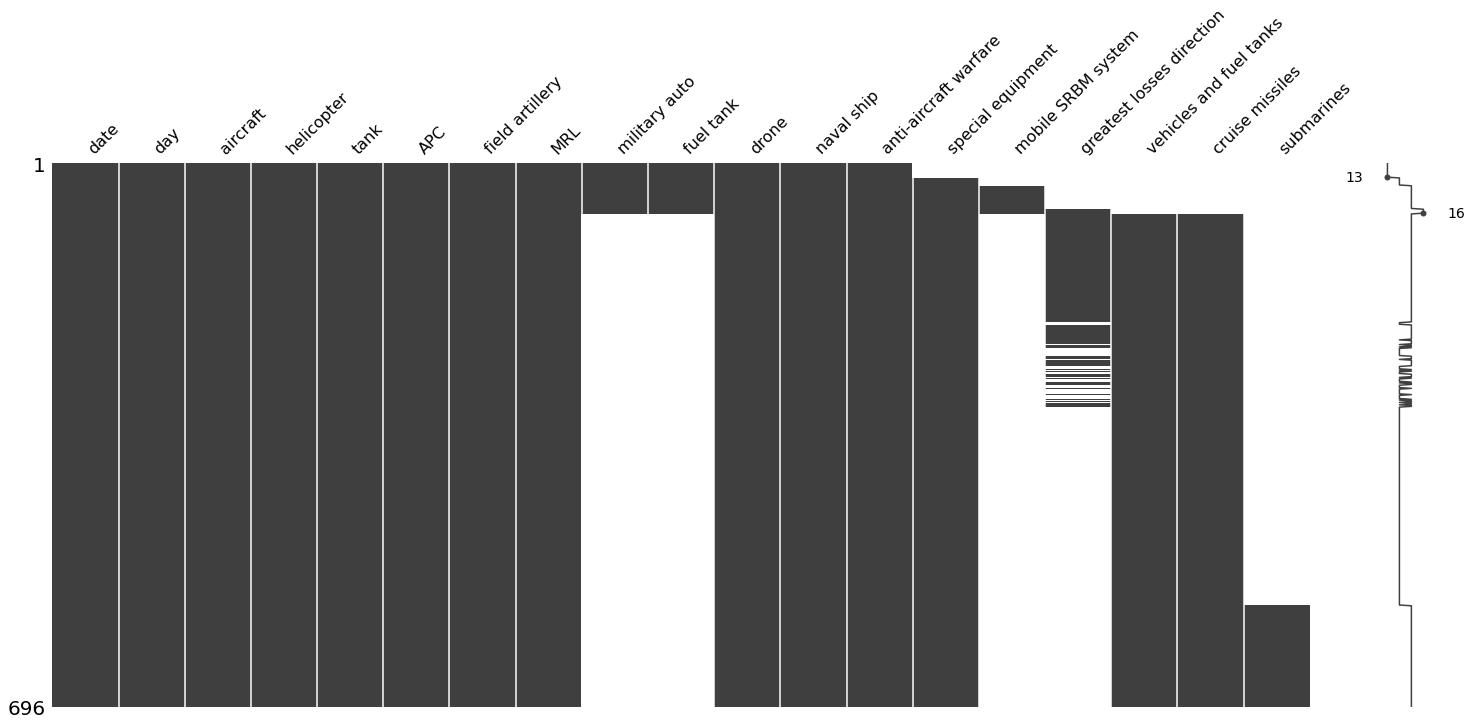

In [10]:
msno.matrix(equipment)

# Broad visualizations

## Personnel

- POW: Prisoner of War

In [11]:
personnel.columns

Index(['date', 'day', 'personnel', 'personnel*', 'POW'], dtype='object')

In [12]:
personnel_ = personnel[['personnel', 'POW']].max()
fig = px.pie(names = personnel_.index,
             values = personnel_.values,
             title = 'Personnel Losses and POWs')
fig.update_traces(textposition='inside', textinfo='value+percent+label')
fig.show()

<h4>- We can see that there's much more personnel losses than Prisioners of War.

In [13]:
#personnel
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=personnel.date,
                         y=personnel.personnel,
                         name='Personnel',
                         line=dict(color='blue')))
fig.add_trace(go.Scatter(x=personnel.date,
                         y=personnel.POW,
                         name='POW',
                         line=dict(color='red')),
                         secondary_y=True)
fig.update_layout(title='Personnel Losses',
                  yaxis=dict(title='Personnel',
                             tickfont=dict(color="blue"),
                             titlefont=dict(color="blue")),
                  yaxis2=dict(title='POW',
                             titlefont=dict(color="red"),
                             tickfont=dict(color="red")))
fig.show()

<h4>- Personnel losses kept growing in a somewhat linear progression while Prisioners of War grew a lot in the beggining and then very little.
<h4>- The ranges on the left y-axis for personnel losses and right y-axis for POWs.

In [14]:
personnel['personnel*'].value_counts()

about    690
more       6
Name: personnel*, dtype: int64

## Equipment

- MRL: Multiple Rocket Launcher
- APC: Armored Personnel Carrier
- SRBM: Short-range ballistic missile
- UAV: Unmanned Aerial Vehicle
- RPA: Remotely Piloted Vehicle


In [15]:
equipment.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system', 'greatest losses direction',
       'vehicles and fuel tanks', 'cruise missiles', 'submarines'],
      dtype='object')

In [16]:
#cummulative loss of equipment
equipment_ = equipment[equipment.columns[2:]].iloc[-1]#.sum(numeric_only=True)
fig = px.pie(values=equipment_.values,
             names=equipment_.index,
             title='Total number of losses by equipment')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [17]:
equipment_ = equipment[equipment.columns[2:]].select_dtypes(include=np.number).iloc[-1]#.sum(numeric_only=True)
equipment_ = equipment_.reset_index()
equipment_.columns = ['equipment', 'count']

#types of equipment
#source: https://www.kaggle.com/code/rhesamulyadi/daily-updates-ukraine-war-data-visualizations
air_units = ['drone','aircraft','helicopter', 'cruise missiles']
naval_units = ['naval ship']

def get_type(equipment):
    if equipment in air_units:
        return 'Air'
    if equipment in naval_units:
        return 'Naval'
    else:
        return 'Ground'

equipment_['type'] = equipment_['equipment'].apply( lambda x: get_type(x))

fig = px.sunburst(equipment_, path=['type', 'equipment'], values='count',
                 title='Equipment losses grouped by type')
fig.show()

<h4> APC = Armored Personnel Carriers
<h4> MRL = Multiple Rocket Launcher

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=equipment.date, 
                         y=equipment[equipment.columns[2:]].sum(
                         axis=1, numeric_only=True),
                         mode='lines+markers'))
fig.update_layout(title='All Units Losses')
fig.show()

air_units = ['drone','aircraft','helicopter', 'cruise missiles']
naval_units = ['naval ship']
ground_units = [x for x in equipment.columns if x not in air_units+naval_units+['date','day']]

fig = go.Figure()
for column in air_units:
    fig.add_traces(go.Scatter(x=equipment.date,
                              y=equipment[column],
                              name=column,
                              mode='lines+markers'))
fig.update_layout(title='Air Units Losses')
fig.show()

fig = go.Figure()
for column in ground_units:
    fig.add_traces(go.Scatter(x=equipment.date,
                              y=equipment[column],
                              name=column,
                              mode='lines+markers'))
fig.update_layout(title='Ground Units Losses')
fig.show()

fig = go.Figure()
for column in naval_units:
    fig.add_traces(go.Scatter(x=equipment.date,
                              y=equipment[column],
                              name=column,
                              mode='lines+markers'))
fig.update_layout(title='Naval Units Losses - naval ships')
fig.show()

In [19]:
equipment[['date','greatest losses direction']][89:]

,date,greatest losses direction
89,2022-05-25,Lyman
90,2022-05-26,Avdiivka
91,2022-05-27,Avdiivka
92,2022-05-28,Avdiivka and Kryvyi Rih
93,2022-05-29,Bakhmut
...,...,...
691,2024-01-17,NaN
692,2024-01-18,NaN
693,2024-01-19,NaN
694,2024-01-20,NaN


<H4> Since May 25 there's data about the direction of greatest losses. Before that, the data is null.

# Specific questions

- How are all columns correlated with each other?
- With which equipment losses are personnel losses more correlated?
- With which equipment losses are POW (prisioners of war) more correlated?
- What's the POW / personell loses ratio?
- How is the distribution of directions of greatest losses ?

#### How are all columns correlated with each other?

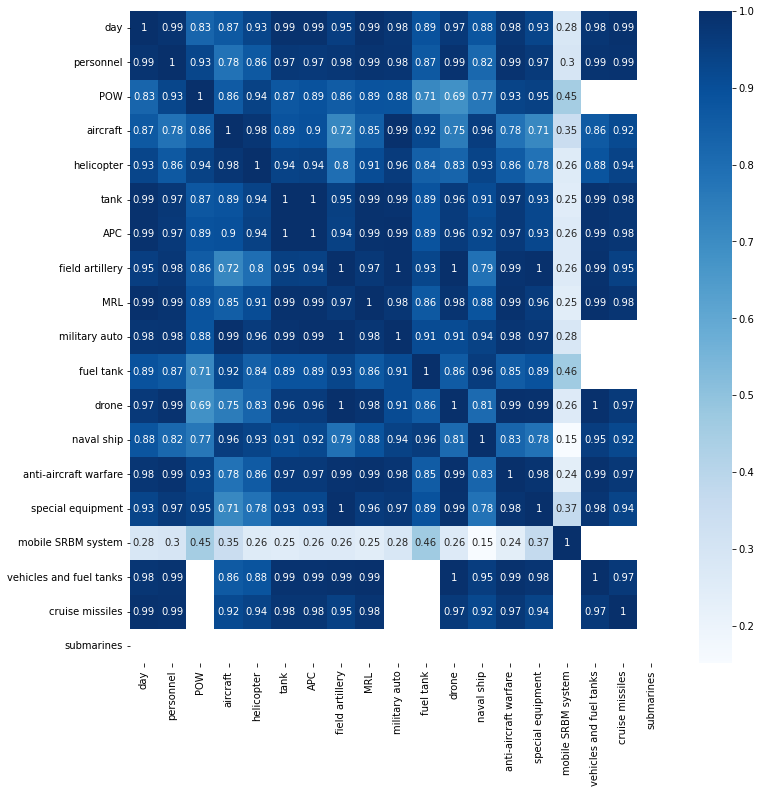

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(personnel.merge(equipment, left_on=['date','day'],
                                                   right_on=['date','day']).corr(),
                                  annot=True, cmap='Blues')
plt.show()

#### How are personnel losses correlated with equipment losses?

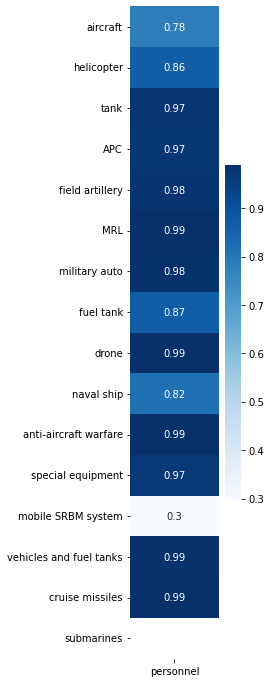

In [21]:
plt.figure(figsize=(2,12))
sns.heatmap(personnel[['date','day','personnel']].merge(equipment, left_on=['date','day'],
                                  right_on=['date','day']).corr()[['personnel']][2:],
                                  annot=True, cmap='Blues')
plt.show()

#### How are POWs (prisioners of war) correlated with equipment losses?

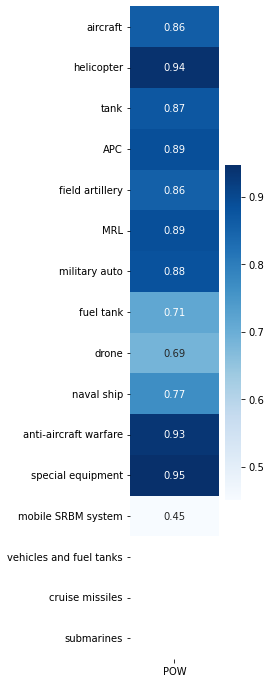

In [22]:
plt.figure(figsize=(2,12))
sns.heatmap(personnel[['date','day','POW']].merge(equipment, left_on=['date','day'],
                                  right_on=['date','day']).corr()[['POW']][2:],
                                  annot=True, cmap='Blues')
plt.show()

#### What's the POW / personell loses ratio?

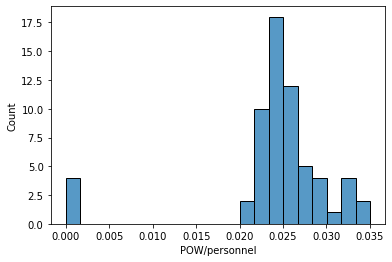

In [23]:
fig = sns.histplot(personnel['POW']/personnel['personnel'])
plt.xlabel('POW/personnel')
plt.show()

In [24]:
print(np.mean(personnel['POW']/personnel['personnel']))

0.0240880900077384


#### How is the distribution of directions of greatest losses ?

In [25]:
fig = px.box(equipment[['date', 'greatest losses direction']][89:],
             x='greatest losses direction', y='date')
fig.show()

In [26]:
fig = px.histogram(equipment['greatest losses direction'][89:])
fig.update_xaxes(tickangle=40)
fig.show()